# Kategorický tréning pomocou CNN

Použité dáta: flares

Model s najlepšími výsledkami: 
* Architektúra a výsledok modelu z EXPERIMENTU 2

..........................................................................................................................................................................
* vytváranie datasetu flares2.csv (prepočítané hodnoty latitude a longitude)

* vytváranie datasetu flares3.csv (zamenené hodnoty v stĺpcoch latitude a longitude)
-------------------------------------------------------------------------------------------

In [3]:
import pandas as pd

In [33]:
flares = pd.read_csv("csv's/flares.csv")
flares.head(3)

,class,level,time,latitude,longitude
0,C,5.7,01 May 2010 at 01:39,173.078231,23.731655
1,C,3.6,04 May 2010 at 16:29,227.097784,40.917763
2,C,2.3,05 May 2010 at 07:16,226.567829,40.925556


Latitude angle(s) must be within -90 deg <= angle <= 90 deg, got 193.078 deg

In [19]:
flares['latitude'] = pd.to_numeric(flares['latitude'], errors='coerce')
flares['longitude'] = pd.to_numeric(flares['longitude'], errors='coerce')

print(f"lat min:  {flares['latitude'].min()}, lat max: {flares['latitude'].max()}")
print(f"lon min:  {flares['longitude'].min()}, lon max: {flares['longitude'].max()}")

lat min:  0.055554, lat max: 359.912026
lon min:  -30.49118, lon max: 40.925556


In [30]:
import pandas as pd
import numpy as np

# nacitanie datasetu
file_path = "csv's/flares.csv"
flares = pd.read_csv(file_path)

# ulozenie povodneho datasetu do noveho suboru
output_file_path = "csv's/flares2.csv"
flares.to_csv(output_file_path, index=False)

# konverzia stlpcov latitude a longitude na ciselne hodnoty
flares['latitude'] = pd.to_numeric(flares['latitude'], errors='coerce')
flares['longitude'] = pd.to_numeric(flares['longitude'], errors='coerce')

# funkcia na transformaciu latitude a longitude
def transform_lat_lon(row):
    try:
        # ziskanie suradnic zo stlpca
        latitude = row['latitude']
        longitude = row['longitude']
        
        # prevod latitude z rozsahu [0, 360) na hodnoty v rozsahu do 90
        if latitude < 90:
            lat = round(latitude, 3)
        elif latitude < 180:
            lat = round(latitude - 90, 3)
        elif latitude < 270:
            lat = round(latitude - 180, 3)
        elif latitude < 360:
            lat = round(latitude - 270, 3)
        else:
            lat = None

        # longitude ostava nezmenene
        lon = round(longitude, 3)

        return lat, lon
    except Exception as e:
        print(f"Error in row: {row}, {e}")
        # v pripade chyby vrat None
        return None, None

# aplikovanie transformacie na cely dataset
flares[['lat', 'lon']] = flares.apply(transform_lat_lon, axis=1, result_type='expand')

# ulozenie upraveneho datasetu do noveho suboru
output_file_path = "csv's/flares2.csv"
flares.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to: {output_file_path}")

Updated dataset saved to: csv's/flares2.csv


# pocty

In [8]:
# cistenie folderov
import os
import shutil

def clear_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  
        os.makedirs(folder_path)  #

if __name__ == "__main__":
    output_folder = "flares"
    clear_folder(output_folder)

In [86]:
import os

# Nastavenie cesty k priečinku
directory_path1 = "data2/C"
directory_path2 = "data2/M"
directory_path3 = "data2/X"

# Získanie zoznamu súborov v priečinku
image_files1 = [f for f in os.listdir(directory_path1) if os.path.isfile(os.path.join(directory_path1, f))]
image_files2 = [f for f in os.listdir(directory_path2) if os.path.isfile(os.path.join(directory_path2, f))]
image_files3 = [f for f in os.listdir(directory_path3) if os.path.isfile(os.path.join(directory_path3, f))]

# Spočítanie súborov
image_count1 = len(image_files1)
image_count2 = len(image_files2)
image_count3 = len(image_files3)

print(f"{directory_path1}: {image_count1}, {directory_path2}: {image_count2}, {directory_path3}: {image_count3}")

data2/C: 5971, data2/M: 623, data2/X: 43


# stahovanie 

In [18]:
pip install h5py==3.7.0 astropy==6.1.4 parfive==2.1.0 Glymur==0.13.6 sunpy==6.0.3 numpy==1.24.4 hvpy==1.1.0 hvpy==1.1.0 aiapy==0.7.4 opencv-python==4.10.0.84 ultralytics torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 764.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.9/501.9 kB 13.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 21.8 MB/s eta 0:00:0000:01
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

# vytvorenie flares3.csv (výmena stĺpcov latitude a longitude)

In [7]:
import pandas as pd

# nacitanie suboru
file_path = "csv's/flares.csv"
data = pd.read_csv(file_path)

# premenovanie stlpcov
data.rename(columns={'latitude': 'longitude', 'longitude': 'latitude'}, inplace=True)
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# ulozenie aktualneho datasetu
output_path = "csv's/flares3.csv"
data.to_csv(output_path, index=False)

print(f"Columns swapped and dataset saved to {output_path}.")


Columns swapped and dataset saved to csv's/flares3.csv.


CNN Flares 5 pred + peak + 5 pokus 3

Found 52157 images belonging to 3 classes.
Found 5842 images belonging to 3 classes.
Found 14569 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


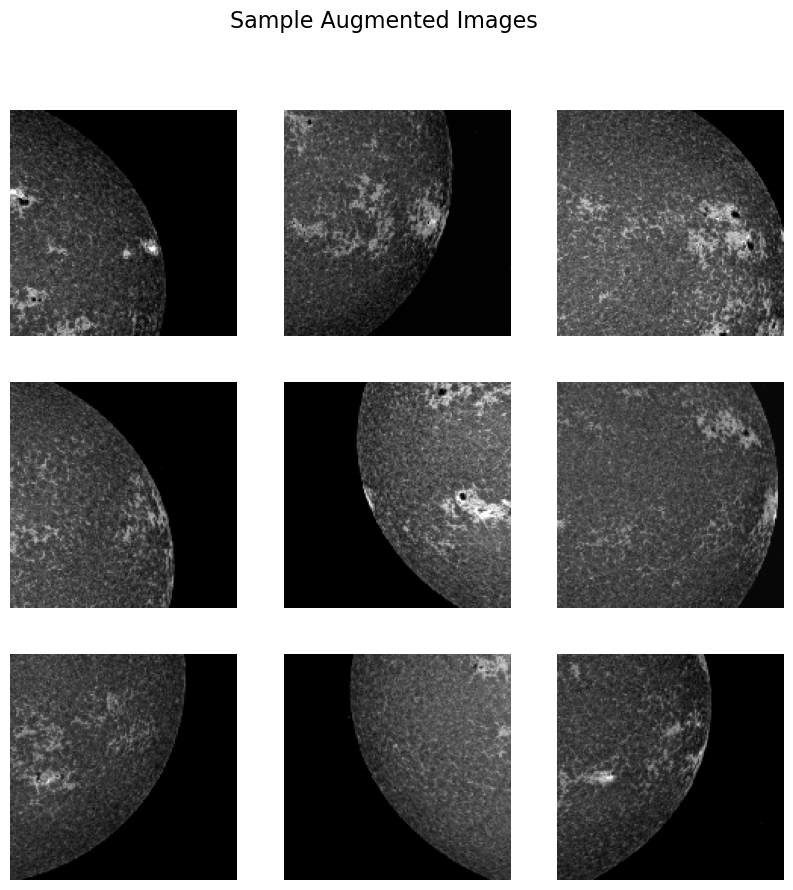

Class weights: {0: 0.3705543004106455, 1: 3.5415902763631424, 2: 158.05151515151516}
Epoch 1/100
1630/1630 [==============================] - 1341s 822ms/step - loss: 19.7594 - accuracy: 0.4644 - val_loss: 22.6653 - val_accuracy: 0.8725 - lr: 5.0000e-05
Epoch 2/100
1630/1630 [==============================] - 1344s 825ms/step - loss: 9.1233 - accuracy: 0.6965 - val_loss: 27.6286 - val_accuracy: 0.8490 - lr: 5.0000e-05
Epoch 3/100
1630/1630 [==============================] - 1345s 825ms/step - loss: 7.2879 - accuracy: 0.7869 - val_loss: 20.8412 - val_accuracy: 0.8442 - lr: 5.0000e-05
Epoch 4/100
1630/1630 [==============================] - 1343s 824ms/step - loss: 6.4189 - accuracy: 0.8173 - val_loss: 26.7543 - val_accuracy: 0.6857 - lr: 5.0000e-05
Epoch 5/100
1630/1630 [==============================] - 1344s 824ms/step - loss: 5.7661 - accuracy: 0.8312 - val_loss: 10.9510 - val_accuracy: 0.8607 - lr: 5.0000e-05
Epoch 6/100
1630/1630 [==============================] - 1347s 826ms/step 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1630/1630 [==============================] - 1351s 829ms/step - loss: 3.8526 - accuracy: 0.8897 - val_loss: 32.3848 - val_accuracy: 0.3966 - lr: 2.5000e-05
Epoch 15/100
1630/1630 [==============================] - ETA: 0s - loss: 3.7139 - accuracy: 0.8903
Epoch 15: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
161/456 [=========>....................] - ETA: 1:57 - loss: 3.9164 - accuracy: 0.8870

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
# pokus 3 pre flares

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenie priecinkov s datami
base_folder = "./flares"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "valid")
test_dir = os.path.join(base_folder, "test")

# generator trenovacich dat s augmentaciou
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    brightness_range=(0.8, 1.2),
    preprocessing_function=lambda x: tf.image.adjust_contrast(x, np.random.uniform(0.8, 1.2)),
    #rotation_range=20,
    #zoom_range=0.3,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# generator pre validacne a testovacie data (len normalizacia)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# nacitanie obrazkov do generatorov
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# zobrazenie ukazkovych augmentovanych obrazkov
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Ukazky augmentovanych obrazkov', fontsize=16)
plt.show()

# vypocet vah pre triedy
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# zvysenie vahy pre triedu X
if 'X' in class_indices:
    class_weights_dict[class_indices['X']] *= 3.0
print("Class weights:", class_weights_dict)

# definicia vlastnej funkcie focal loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# definicia CNN modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# definovanie callbackov early stop 10 epoch
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# znizenie learning rate, keď sa validacna chyba (val_loss) prestane zlepsovat
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# vyhodnotenie modelu na testovacich datach
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a konfuzna matica
y_pred = np.argmax(model.predict(test_generator), axis=1)  # predikovane triedy
y_true = test_generator.classes  # skutocne triedy

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_labels))))  # spravne zoradenie

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Konfuzna matica')
plt.xlabel('Predikovane')
plt.ylabel('Skutocne')
plt.show()

# class report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ulozenie modelu
model.save("cnn/flares_cnn_model3.h5")

Found 6428 images belonging to 3 classes.
201/201 [==============================] - 65s 321ms/step


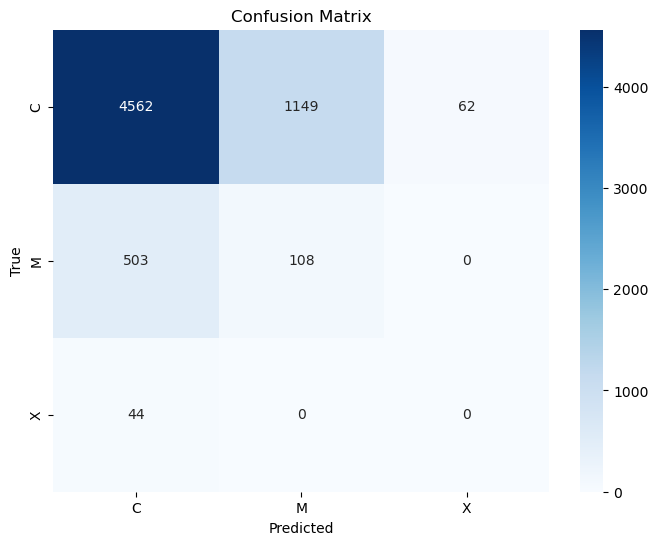

              precision    recall  f1-score   support

           C       0.89      0.79      0.84      5773
           M       0.09      0.18      0.12       611
           X       0.00      0.00      0.00        44

    accuracy                           0.73      6428
   macro avg       0.33      0.32      0.32      6428
weighted avg       0.81      0.73      0.76      6428



In [13]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# nacitanie modelu
model_path = "cnn/flares_cnn_model3.h5"
model = tf.keras.models.load_model(model_path, compile=False)

# rekompilacia
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# nacitanie test data generatora
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_dir = "./flares/test"
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# predikcie
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(test_generator.class_indices.keys())

# vykresleni confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels, output_dict=False))


# <span style="color:green">Architektúra a výsledky modelu z EXPERIMENTU 2</span>   

Found 52187 images belonging to 3 classes.
Found 5885 images belonging to 3 classes.
Found 14586 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0044985455..0.86559814].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024772765..1.066413].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03570832..0.6782611].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01604378..0.72805417].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.021496044..0.7942494].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.016932067..0.9317313].


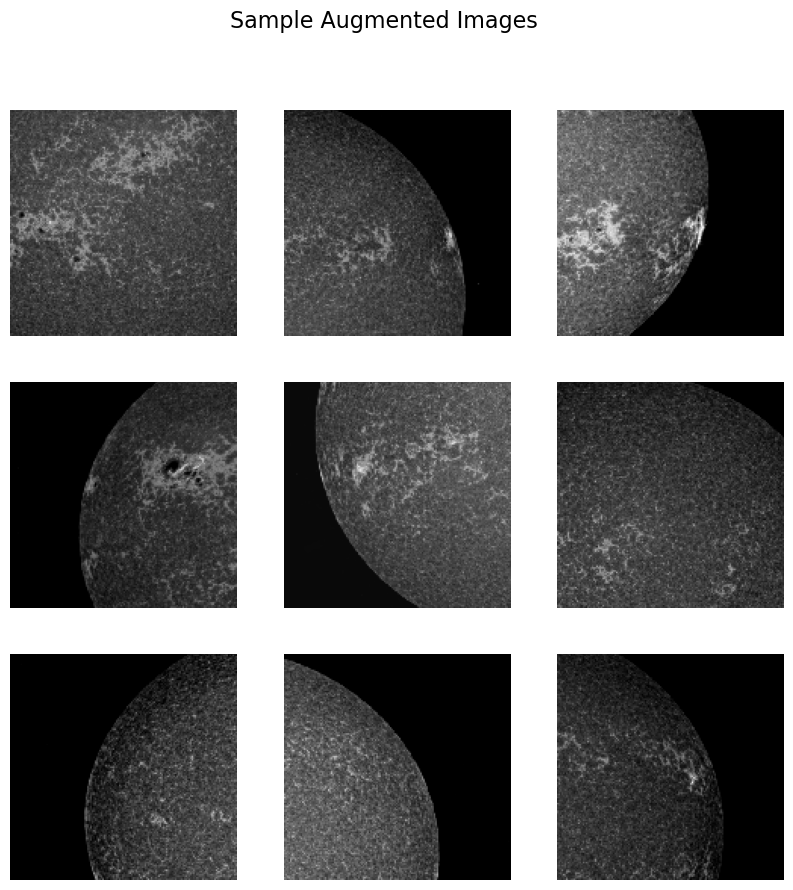

Class weights: {0: np.float64(0.37076743822555663), 1: np.float64(3.5436273511237864), 2: np.float64(144.9638888888889)}


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1531s 935ms/step - accuracy: 0.2895 - loss: 3.1684 - val_accuracy: 0.0112 - val_loss: 61.4143 - learning_rate: 5.0000e-05
Epoch 2/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1456s 892ms/step - accuracy: 0.2531 - loss: 2.1951 - val_accuracy: 0.0484 - val_loss: 65.5662 - learning_rate: 5.0000e-05
Epoch 3/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1463s 896ms/step - accuracy: 0.2726 - loss: 2.1062 - val_accuracy: 0.0095 - val_loss: 84.5343 - learning_rate: 5.0000e-05
Epoch 4/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1479s 907ms/step - accuracy: 0.2598 - loss: 1.9914 - val_accuracy: 0.0158 - val_loss: 50.7058 - learning_rate: 5.0000e-05
Epoch 5/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1721s 1s/step - accuracy: 0.2472 - loss: 1.9071 - val_accuracy: 0.2486 - val_loss: 26.5530 - learning_rate: 5.0000e-05
Epoch 6/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 1951s 1s/step - accuracy: 0.2467 - loss: 1.8183 - val_accuracy: 0.2493 - val_loss: 25.6026 - learning_rate: 5.0000e-05
Epoch 7/100
1631

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2126s 1s/step - accuracy: 0.3231 - loss: 1.3523 - val_accuracy: 0.2994 - val_loss: 11.6564 - learning_rate: 5.0000e-05
Epoch 17/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2095s 1s/step - accuracy: 0.3231 - loss: 1.3333 - val_accuracy: 0.3718 - val_loss: 6.7013 - learning_rate: 5.0000e-05
Epoch 18/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2115s 1s/step - accuracy: 0.3269 - loss: 1.3020 - val_accuracy: 0.5334 - val_loss: 2.4138 - learning_rate: 5.0000e-05
Epoch 19/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2107s 1s/step - accuracy: 0.3367 - loss: 1.2726 - val_accuracy: 0.4632 - val_loss: 2.2414 - learning_rate: 5.0000e-05
Epoch 20/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2234s 1s/step - accuracy: 0.3525 - loss: 1.2010 - val_accuracy: 0.6148 - val_loss: 3.3819 - learning_rate: 5.0000e-05
Epoch 21/100
 807/1631 ━━━━━━━━━━━━━━━━━━━━ 17:22 1s/step - accuracy: 0.3712 - loss: 1.1234

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2138s 1s/step - accuracy: 0.3883 - loss: 1.0419 - val_accuracy: 0.6379 - val_loss: 1.2301 - learning_rate: 5.0000e-05
Epoch 24/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2121s 1s/step - accuracy: 0.4048 - loss: 1.0743 - val_accuracy: 0.5684 - val_loss: 2.3110 - learning_rate: 5.0000e-05
Epoch 25/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2180s 1s/step - accuracy: 0.4129 - loss: 1.0841 - val_accuracy: 0.6720 - val_loss: 1.2427 - learning_rate: 5.0000e-05
Epoch 26/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2527s 2s/step - accuracy: 0.4220 - loss: 0.9979 - val_accuracy: 0.5874 - val_loss: 0.9985 - learning_rate: 5.0000e-05
Epoch 27/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2084s 1s/step - accuracy: 0.4275 - loss: 0.9997 - val_accuracy: 0.6131 - val_loss: 0.8269 - learning_rate: 5.0000e-05
Epoch 28/100
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2100s 1s/step - accuracy: 0.4487 - loss: 0.9731 - val_accuracy: 0.6505 - val_loss: 0.7710 - learning_rate: 5.0000e-05
Epoch 29/100
1631/1631 ━━━━━━━━━━━━━━━━━━

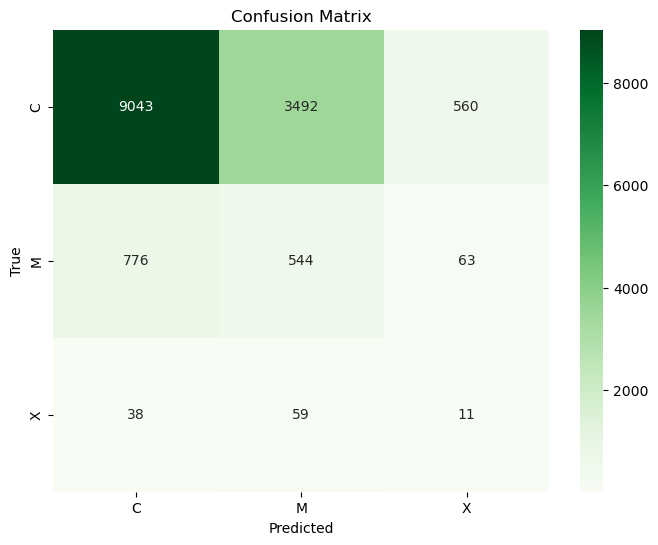

              precision    recall  f1-score   support

           C       0.92      0.69      0.79     13095
           M       0.13      0.39      0.20      1383
           X       0.02      0.10      0.03       108

    accuracy                           0.66     14586
   macro avg       0.36      0.40      0.34     14586
weighted avg       0.84      0.66      0.73     14586



In [6]:
# pokus 4 pre Flares
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# priecinky
base_folder = "./flares"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "valid")
test_dir = os.path.join(base_folder, "test")

# augumentacie dat
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    brightness_range=(0.8, 1.2),
    preprocessing_function=lambda x: tf.image.adjust_contrast(x, np.random.uniform(0.8, 1.2)),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# zobrazenie ukazkovych obrazkov erupcii
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images', fontsize=16)
plt.show()

# vahy tried
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# pridanie vahy pre triedu X
if 'X' in class_indices:
    class_weights_dict[class_indices['X']] *= 3.0  
print("Class weights:", class_weights_dict)

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# early stop
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# znizenie learning rate, keď sa validacna chyba (val_loss) prestane zlepsovat
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# trening modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

from tqdm import tqdm
import logging
tf.get_logger().setLevel(logging.ERROR)

# Reset generatoru na zaciatok
test_generator.reset()

# pocet batchov
steps = test_generator.samples // test_generator.batch_size + int(test_generator.samples % test_generator.batch_size > 0)

# Batched predikcie
y_pred_probs = model.predict(test_generator, steps=steps, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes  # True 

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_labels)))) 

# vykreslenie confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# klasifikacny report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ulozenie modelu
model.save("cnn/flares_cnn_model4.h5")